In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
amzn = quandl.get("EOD/AMZN", authtoken="c21G9h6pR7iz5pMn2d3X",start_date=start,end_date=end,
                  index_col='Date',parse_dates=True)
aapl = quandl.get("EOD/AAPL", authtoken="c21G9h6pR7iz5pMn2d3X",start_date=start,end_date=end,
                  index_col='Date',parse_dates=True)
ibm = quandl.get("EOD/IBM", authtoken="c21G9h6pR7iz5pMn2d3X",start_date=start,end_date=end,
                 index_col='Date',parse_dates=True)
cisco = quandl.get("EOD/CSCO", authtoken="c21G9h6pR7iz5pMn2d3X",start_date=start,end_date=end,
                   index_col='Date',parse_dates=True)

In [4]:
aapl_close = pd.DataFrame(aapl['Close'])
amzn_close = pd.DataFrame(amzn['Close'])
ibm_close = pd.DataFrame(ibm['Close'])
cisco_close = pd.DataFrame(cisco['Close'])

In [5]:
aapl_close.columns = ['AAPL CLOSE']
amzn_close.columns = ['AMZN CLOSE']
ibm_close.columns = ['IBM CLOSE']
cisco_close.columns = ['CSCO CLOSE']

In [6]:
close1_df = aapl_close.merge(amzn_close,left_index=True,right_on=['Date'])

In [7]:
close1_df.head()

,AAPL CLOSE,AMZN CLOSE
Date,,
2012-01-03,411.23,179.03
2012-01-04,413.44,177.51
2012-01-05,418.03,177.61
2012-01-06,422.40,182.61
2012-01-09,421.73,178.56


In [8]:
close2_df = close1_df.merge(ibm_close, left_index=True, right_on=['Date'])
close2_df.head()

,AAPL CLOSE,AMZN CLOSE,IBM CLOSE
Date,,,
2012-01-03,411.23,179.03,186.30
2012-01-04,413.44,177.51,185.54
2012-01-05,418.03,177.61,184.66
2012-01-06,422.40,182.61,182.54
2012-01-09,421.73,178.56,181.59


In [9]:
final_closedf = close2_df.merge(cisco_close, left_index=True, right_on=['Date'])
final_closedf.head()

,AAPL CLOSE,AMZN CLOSE,IBM CLOSE,CSCO CLOSE
Date,,,,
2012-01-03,411.23,179.03,186.30,18.63
2012-01-04,413.44,177.51,185.54,18.99
2012-01-05,418.03,177.61,184.66,18.92
2012-01-06,422.40,182.61,182.54,18.85
2012-01-09,421.73,178.56,181.59,18.97


In [10]:
final_closedf.tail()

,AAPL CLOSE,AMZN CLOSE,IBM CLOSE,CSCO CLOSE
Date,,,,
2016-12-23,116.52,760.59,166.71,30.53
2016-12-27,117.26,771.40,167.14,30.68
2016-12-28,116.76,772.13,166.19,30.42
2016-12-29,116.73,765.15,166.60,30.46
2016-12-30,115.82,749.87,165.99,30.22


In [11]:
final_closedf.pct_change(1).mean()

AAPL CLOSE   -0.000017
AMZN CLOSE    0.001328
IBM CLOSE    -0.000022
CSCO CLOSE    0.000487
dtype: float64

In [13]:
final_closedf.pct_change(1).corr()

,AAPL CLOSE,AMZN CLOSE,IBM CLOSE,CSCO CLOSE
AAPL CLOSE,1.000000,0.142283,0.168834,0.171324
AMZN CLOSE,0.142283,1.000000,0.259765,0.284077
IBM CLOSE,0.168834,0.259765,1.000000,0.422506
CSCO CLOSE,0.171324,0.284077,0.422506,1.000000


In [18]:
# DAILY ARITHMETIC RETURNS

final_closedf.pct_change(1).head()

,AAPL CLOSE,AMZN CLOSE,IBM CLOSE,CSCO CLOSE
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.008490,-0.004079,0.019324
2012-01-05,0.011102,0.000563,-0.004743,-0.003686
2012-01-06,0.010454,0.028152,-0.011481,-0.003700
2012-01-09,-0.001586,-0.022178,-0.005204,0.006366


In [19]:
# LOG RETURNS

log_returns = np.log(final_closedf/final_closedf.shift(1))
log_returns.head()

,AAPL CLOSE,AMZN CLOSE,IBM CLOSE,CSCO CLOSE
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,-0.008526,-0.004088,0.019139
2012-01-05,0.011041,0.000563,-0.004754,-0.003693
2012-01-06,0.010400,0.027763,-0.011547,-0.003707
2012-01-09,-0.001587,-0.022428,-0.005218,0.006346


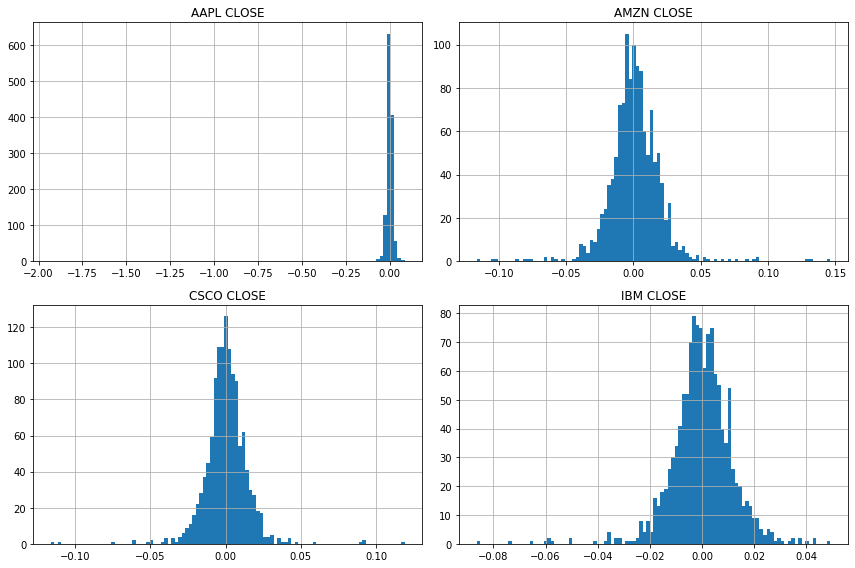

In [20]:
log_returns.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [21]:
log_returns.mean()

AAPL CLOSE   -0.001008
AMZN CLOSE    0.001139
IBM CLOSE    -0.000092
CSCO CLOSE    0.000385
dtype: float64

In [23]:
log_returns.cov()*252

,AAPL CLOSE,AMZN CLOSE,IBM CLOSE,CSCO CLOSE
AAPL CLOSE,0.815597,0.022025,0.014755,0.018365
AMZN CLOSE,0.022025,0.094470,0.015043,0.019977
IBM CLOSE,0.014755,0.015043,0.035347,0.018016
CSCO CLOSE,0.018365,0.019977,0.018016,0.051631


In [30]:
np.random.seed(101)
print(final_closedf.columns)

weights = np.array(np.random.random(4))

print("Random Weights: ")
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# EXPECTED RETURN
# ALL WE ARE DOING HERE IS TAKING THE LOG RETURN
# multiplying by the weights we just created and 252 trading days in a year
# taking the sum of that
# YIELDS EXPECTED LOG RETURN
print('Expected Portfolio Return')
exp_ret = np.sum(log_returns.mean()*weights*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
print(exp_vol)

# SHARPE RATIO
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['AAPL CLOSE', 'AMZN CLOSE', 'IBM CLOSE', 'CSCO CLOSE'], dtype='object')
Random Weights: 
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
0.03781012299658028
Expected Volatility
0.4045060865478368
Sharpe Ratio
0.09347232156445898


In [42]:
np.random.seed(101)


num_portfolios = 20000
all_weights = np.zeros((num_portfolios,len(final_closedf.columns)))
return_arr = np.zeros(num_portfolios)
volatility_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for index in range(num_portfolios):

    # WEIGHTS
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # SAVE WEIGHTS
    all_weights[index,:] = weights

    # EXPECTED RETURN
    return_arr[index] = np.sum(log_returns.mean()*weights*252)


    # EXPECTED VOLATILITY
    volatility_arr[index] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))


    # SHARPE RATIO
    sharpe_arr[index] = return_arr[index]/volatility_arr[index]


In [43]:
sharpe_arr.max()

0.9275010838850466

In [44]:
sharpe_arr.argmax()

497

In [45]:
all_weights[497,:]

array([0.00727949, 0.70755253, 0.02712018, 0.25804781])

In [48]:
max_sr_return = return_arr[497]
max_sr_volatility = volatility_arr[497]

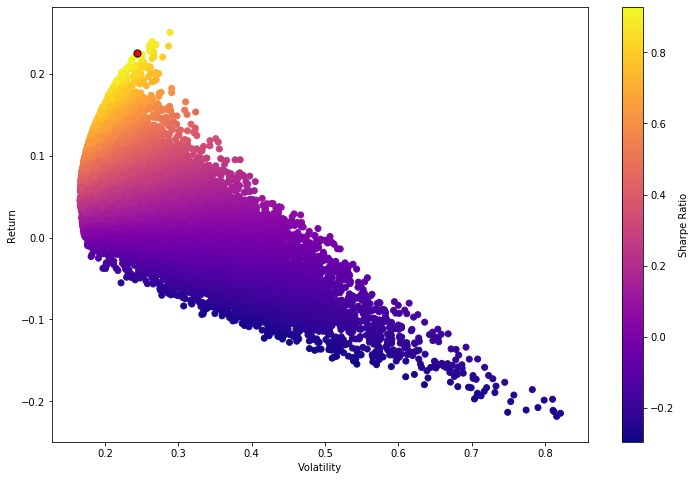

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_arr,return_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_volatility,max_sr_return,c='red',s=50,edgecolors='black')

In [53]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_returns.mean()*weights*252)
    vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [54]:
from scipy.optimize import minimize

In [55]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*-1

In [56]:
def check_sum(weights):
    # return 0 if the sum of the weights is 1
    return np.sum(weights)-1

In [61]:
cons = ({'type':'eq','fun':check_sum})

In [62]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [63]:
initial_guess = [0.25,0.25,0.25,0.25]

In [64]:
opt_results = minimize(neg_sharpe,initial_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [65]:
opt_results

     fun: -0.9489802954990848
     jac: array([ 1.27201499e+00,  4.75049019e-05,  3.07779029e-01, -1.79015100e-04])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([4.08093698e-16, 7.90301947e-01, 0.00000000e+00, 2.09698053e-01])

In [67]:
opt_results.x

array([4.08093698e-16, 7.90301947e-01, 0.00000000e+00, 2.09698053e-01])

In [68]:
get_ret_vol_sr(opt_results.x)

array([0.24727347, 0.26056755, 0.9489803 ])

In [69]:
frontier_y = np.linspace(0,0.3,100)

In [70]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [72]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility,initial_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

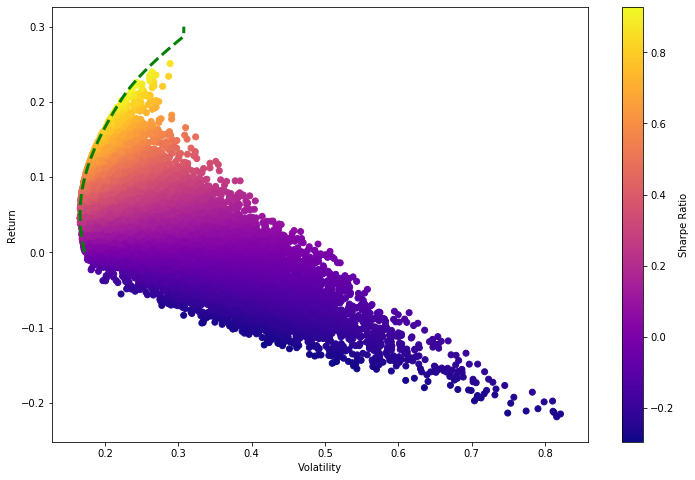

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_arr,return_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)